In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=66c3e741ce74565d687caeeeb19bdfe1


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | jamestown
Processing Record 2 of Set 13 | bredasdorp
Processing Record 3 of Set 13 | leningradskiy
Processing Record 4 of Set 13 | asau
Processing Record 5 of Set 13 | alamosa
Processing Record 6 of Set 13 | kaitangata
Processing Record 7 of Set 13 | rikitea
Processing Record 8 of Set 13 | halifax
Processing Record 9 of Set 13 | ushuaia
Processing Record 10 of Set 13 | altay
Processing Record 11 of Set 13 | kodiak
Processing Record 12 of Set 13 | sinnamary
Processing Record 13 of Set 13 | yellowknife
Processing Record 14 of Set 13 | east london
Processing Record 15 of Set 13 | sitka
Processing Record 16 of Set 13 | poso
Processing Record 17 of Set 13 | butaritari
Processing Record 18 of Set 13 | airai
Processing Record 19 of Set 13 | bluff
Processing Record 20 of Set 13 | carnarvon
Processing Record 21 of Set 13 | barrow
Processing Record 22 of Set 13 | tunduru
City not found. Skipping...
Proces

Processing Record 36 of Set 16 | lerwick
Processing Record 37 of Set 16 | lebu
Processing Record 38 of Set 16 | ust-nera
Processing Record 39 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 40 of Set 16 | payakumbuh
Processing Record 41 of Set 16 | codrington
Processing Record 42 of Set 16 | sevojno
Processing Record 43 of Set 16 | rocha
Processing Record 44 of Set 16 | amderma
City not found. Skipping...
Processing Record 45 of Set 16 | doha
Processing Record 46 of Set 16 | touros
Processing Record 47 of Set 16 | namibe
Processing Record 48 of Set 16 | dunedin
Processing Record 49 of Set 16 | barentsburg
City not found. Skipping...
Processing Record 50 of Set 16 | upernavik
Processing Record 1 of Set 17 | sabzevar
Processing Record 2 of Set 17 | geraldton
Processing Record 3 of Set 17 | lagoa
Processing Record 4 of Set 17 | bonthe
Processing Record 5 of Set 17 | virginia beach
Processing Record 6 of Set 17 | rio grande
Processing Record 7 of Set 17 | araouane
Pro

Processing Record 22 of Set 20 | hualmay
Processing Record 23 of Set 20 | tumannyy
City not found. Skipping...
Processing Record 24 of Set 20 | makat
Processing Record 25 of Set 20 | bataipora
Processing Record 26 of Set 20 | dakar
Processing Record 27 of Set 20 | manadhoo
Processing Record 28 of Set 20 | yirol
City not found. Skipping...
Processing Record 29 of Set 20 | roald
Processing Record 30 of Set 20 | aloleng
Processing Record 31 of Set 20 | chapais
Processing Record 32 of Set 20 | zhezkazgan
Processing Record 33 of Set 20 | pontarlier
Processing Record 34 of Set 20 | puerto carreno
Processing Record 35 of Set 20 | itamaraju
Processing Record 36 of Set 20 | thinadhoo
Processing Record 37 of Set 20 | vardo
Processing Record 38 of Set 20 | amapa
Processing Record 39 of Set 20 | mongu
Processing Record 40 of Set 20 | shujaabad
Processing Record 41 of Set 20 | santa rosa
Processing Record 42 of Set 20 | soderhamn
Processing Record 43 of Set 20 | simao
Processing Record 44 of Set 20

Processing Record 7 of Set 24 | ngukurr
City not found. Skipping...
Processing Record 8 of Set 24 | strzelin
Processing Record 9 of Set 24 | baruun-urt
Processing Record 10 of Set 24 | roma
Processing Record 11 of Set 24 | te anau
Processing Record 12 of Set 24 | agadez
Processing Record 13 of Set 24 | batemans bay
Processing Record 14 of Set 24 | hammerfest
Processing Record 15 of Set 24 | san felipe
Processing Record 16 of Set 24 | ayan
Processing Record 17 of Set 24 | landerneau
Processing Record 18 of Set 24 | waipawa
Processing Record 19 of Set 24 | baykit
Processing Record 20 of Set 24 | san-pedro
Processing Record 21 of Set 24 | puerto escondido
Processing Record 22 of Set 24 | orlik
Processing Record 23 of Set 24 | canutama
Processing Record 24 of Set 24 | oksfjord
Processing Record 25 of Set 24 | tukrah
Processing Record 26 of Set 24 | sao joao da barra
Processing Record 27 of Set 24 | plymouth
Processing Record 28 of Set 24 | havre-saint-pierre
Processing Record 29 of Set 24 

In [13]:
print(len(city_data))

558


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,78.80,36,1,4.70,US,2020-06-17 22:50:44
1,Bredasdorp,-34.53,20.04,42.80,93,0,4.94,ZA,2020-06-17 22:51:30
2,Leningradskiy,69.38,178.42,51.48,49,100,8.59,RU,2020-06-17 22:51:30
3,Asau,46.43,26.40,57.00,94,92,3.11,RO,2020-06-17 22:51:30
4,Alamosa,37.47,-105.87,80.60,5,1,16.11,US,2020-06-17 22:51:30
5,Kaitangata,-46.28,169.85,48.99,52,7,5.99,NZ,2020-06-17 22:51:30
6,Rikitea,-23.12,-134.97,75.54,79,54,15.46,PF,2020-06-17 22:51:30
7,Halifax,44.65,-63.57,68.00,58,25,1.01,CA,2020-06-17 22:48:42
8,Ushuaia,-54.80,-68.30,35.60,80,63,5.82,AR,2020-06-17 22:51:29
9,Altay,47.87,88.12,61.30,65,100,1.59,CN,2020-06-17 22:51:31


In [15]:
# Create the output file (CSV).
output_data_file = "Resources/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'06/17/20'

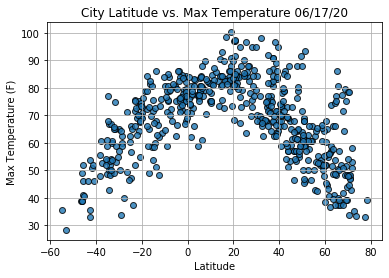

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

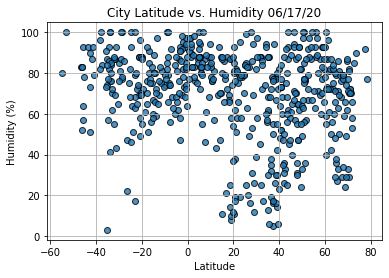

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig2.png")
# Show plot.
plt.show()

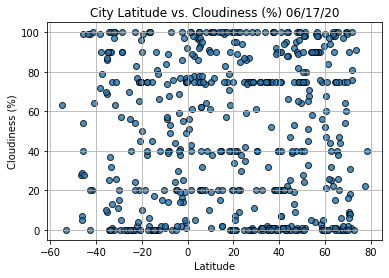

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig3.png")
# Show plot.
plt.show()

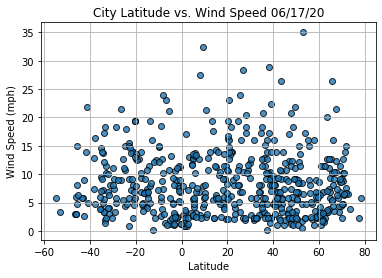

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig4.png")
# Show plot.
plt.show()

# Plotting Linear Regression with Weather Data

In [33]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                  East London
Lat                        -33.02
Lng                         27.91
Max Temp                    59.95
Humidity                       70
Cloudiness                      1
Wind Speed                  11.52
Country                        ZA
Date          2020-06-17 22:51:32
Name: 13, dtype: object

In [35]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
553    False
554    False
555    False
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,78.80,36,1,4.70,US,2020-06-17 22:50:44
2,Leningradskiy,69.38,178.42,51.48,49,100,8.59,RU,2020-06-17 22:51:30
3,Asau,46.43,26.40,57.00,94,92,3.11,RO,2020-06-17 22:51:30
4,Alamosa,37.47,-105.87,80.60,5,1,16.11,US,2020-06-17 22:51:30
7,Halifax,44.65,-63.57,68.00,58,25,1.01,CA,2020-06-17 22:48:42
...,...,...,...,...,...,...,...,...,...
546,Bucerias,20.75,-105.33,84.99,62,5,12.75,MX,2020-06-17 22:48:59
549,Yakeshi,49.28,120.73,58.91,82,100,9.08,CN,2020-06-17 22:53:25
550,Waddan,29.16,16.14,76.93,26,0,11.56,LY,2020-06-17 22:53:25
556,Anloga,5.79,0.90,80.60,83,40,10.29,GH,2020-06-17 22:53:26


In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [38]:
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,78.80,36,1,4.70,US,2020-06-17 22:50:44
2,Leningradskiy,69.38,178.42,51.48,49,100,8.59,RU,2020-06-17 22:51:30
3,Asau,46.43,26.40,57.00,94,92,3.11,RO,2020-06-17 22:51:30
4,Alamosa,37.47,-105.87,80.60,5,1,16.11,US,2020-06-17 22:51:30
7,Halifax,44.65,-63.57,68.00,58,25,1.01,CA,2020-06-17 22:48:42
...,...,...,...,...,...,...,...,...,...
546,Bucerias,20.75,-105.33,84.99,62,5,12.75,MX,2020-06-17 22:48:59
549,Yakeshi,49.28,120.73,58.91,82,100,9.08,CN,2020-06-17 22:53:25
550,Waddan,29.16,16.14,76.93,26,0,11.56,LY,2020-06-17 22:53:25
556,Anloga,5.79,0.90,80.60,83,40,10.29,GH,2020-06-17 22:53:26


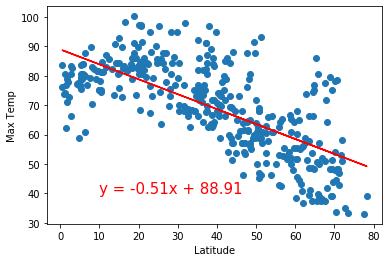

In [44]:
# Linear regression on the Northern Hemisphere between Lat and Max Temps
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))

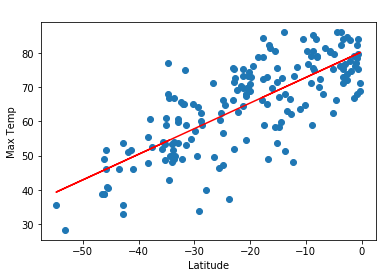

In [40]:
# Linear regression on the Southern Hemisphere between Lat and Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

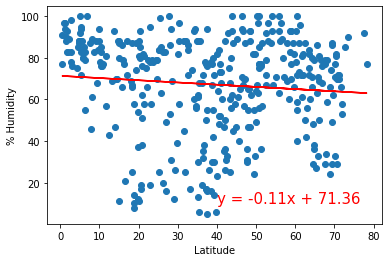

In [45]:
# Linear regression on the Northern Hemisphere between Lat and Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

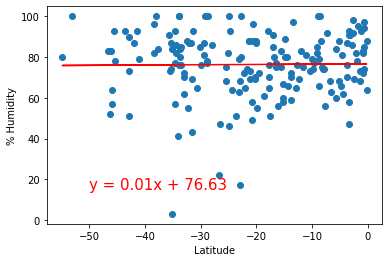

In [46]:
# Linear regression on the Southern Hemisphere between Lat and Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

# Correlation between Latitude and % Cloudiness

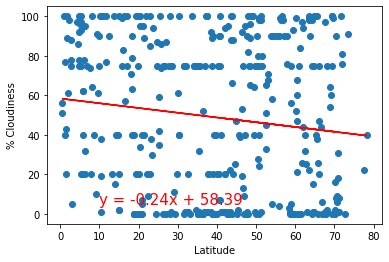

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,5))

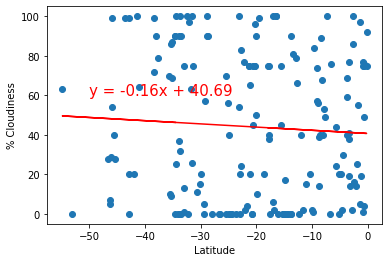

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

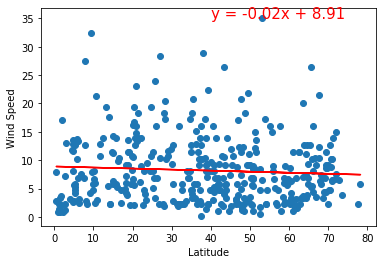

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

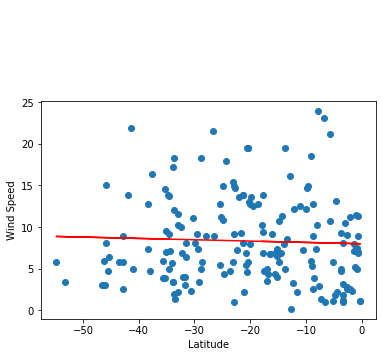

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [56]:
!pip install gmaps

     |████████████████████████████████| 1.1 MB 1.3 MB/s eta 0:00:01
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076096 sha256=6ec2e352990640b4022a27dc0ce3e0b870582342b0b62325f96efab4990406b9
  Stored in directory: /Users/mei/Library/Caches/pip/wheels/3d/1c/cb/c46f4199210e632b28d78d05a00bfdccbf6dfcd3f5b051d6bf
Successfully built gmaps
